In [183]:
import pandas as pd
import numpy as np
import herramientas as her


In [184]:
datos = pd.read_csv('../datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv')
datos.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [185]:
datos.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [186]:
her.print_cols_with_missing_values(datos)

NaN 0


In [187]:
datos.TotalCharges = pd.to_numeric(datos.TotalCharges, errors='coerce')
datos.Churn = (datos.Churn == 'Yes').astype(int)

her.print_cols_with_missing_values(datos)

TotalCharges    11
dtype: int64


In [188]:
# los valores vacios los rellenamos con 0
datos.TotalCharges = datos.TotalCharges.fillna(0)
her.print_cols_with_missing_values(datos)

NaN 0


In [189]:
datos.columns = her.replacer(datos.columns.str)
datos.head().T

,0,1,2,3,4
customerid,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
seniorcitizen,0,0,0,0,0
partner,Yes,No,No,No,No
dependents,No,No,No,No,No
tenure,1,34,2,45,2
phoneservice,No,Yes,Yes,No,Yes
multiplelines,No phone service,No,No,No phone service,No
internetservice,DSL,DSL,DSL,DSL,Fiber optic
onlinesecurity,No,Yes,Yes,Yes,No


In [190]:
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']
numerical = ['tenure', 'monthlycharges', 'totalcharges']
datos[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

/tmp/ipykernel_11031/2079812463.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthlycharges'}>],
       [<AxesSubplot:title={'center':'totalcharges'}>, <AxesSubplot:>]],
      dtype=object)

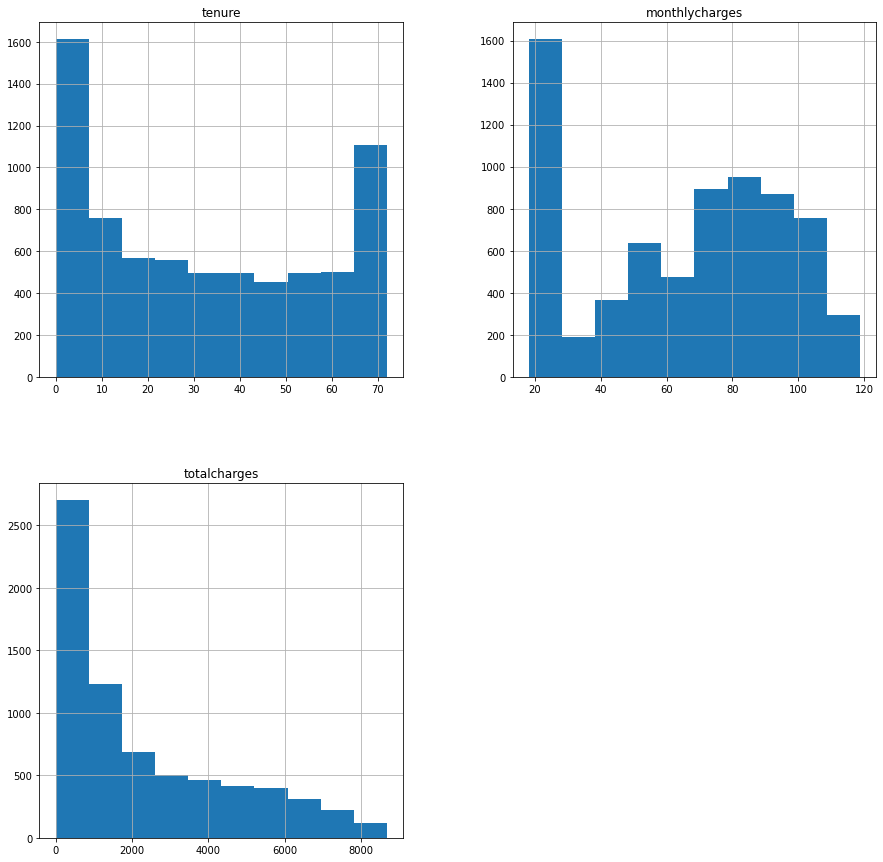

In [191]:
import matplotlib.pyplot as plt
datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())

In [192]:
import seaborn as sns

def draw_hist_boxplot(df, feature_name):
    sns.boxplot(x=feature_name, data=df)
    sns.stripplot(x=feature_name, data=df, color="#474646")

def replace_outliers_with_median(df, feature_name):
    Q1 = datos[feature_name].quantile(0.25)
    median = df[feature_name].quantile(0.5)
    Q3 = df[feature_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[feature_name] = np.where((df[feature_name] < lower_whisker) | 
                                (df[feature_name] > upper_whisker), 
                                 median, 
                                 df[feature_name])

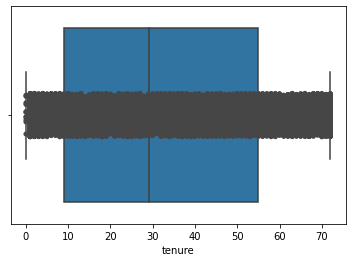

In [193]:
draw_hist_boxplot(datos, 'tenure')

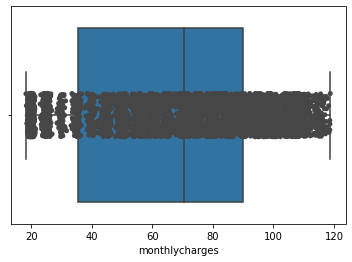

In [194]:
draw_hist_boxplot(datos, 'monthlycharges')

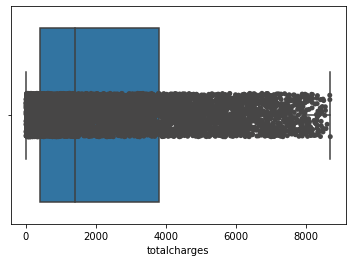

In [195]:
draw_hist_boxplot(datos, 'totalcharges')

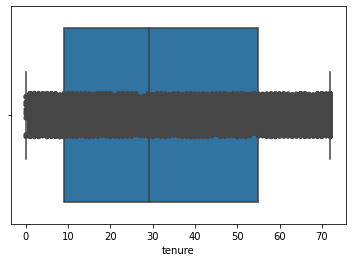

In [196]:
replace_outliers_with_median(datos, 'tenure')
draw_hist_boxplot(datos, 'tenure')

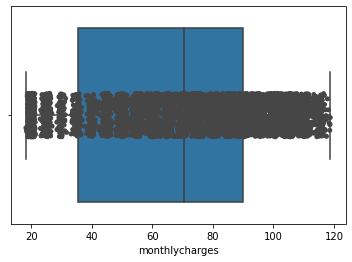

In [197]:
replace_outliers_with_median(datos, 'monthlycharges')
draw_hist_boxplot(datos, 'monthlycharges')

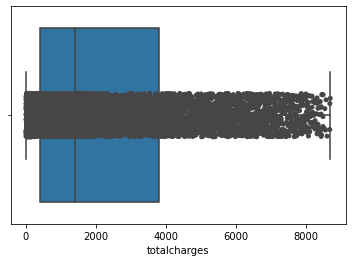

In [198]:
replace_outliers_with_median(datos, 'totalcharges')
draw_hist_boxplot(datos, 'totalcharges')

/tmp/ipykernel_11031/603864513.py:1: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthlycharges'}>],
       [<AxesSubplot:title={'center':'totalcharges'}>, <AxesSubplot:>]],
      dtype=object)

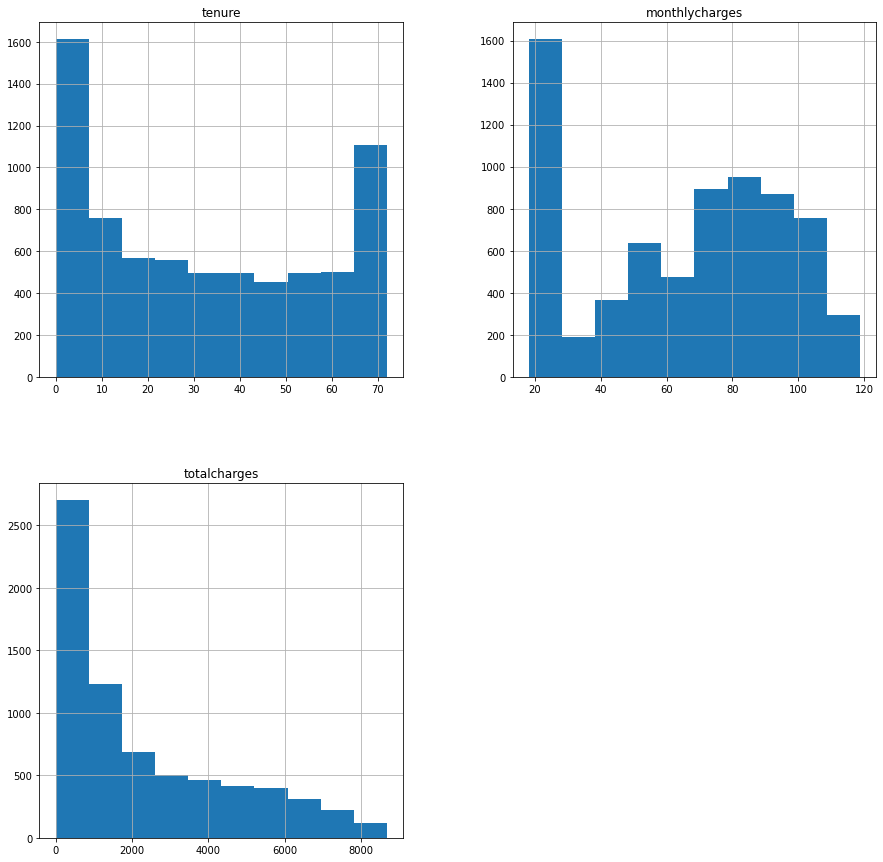

In [199]:
datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())

/tmp/ipykernel_11031/3591978406.py:5: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())


array([[<AxesSubplot:title={'center':'tenure'}>,
        <AxesSubplot:title={'center':'monthlycharges'}>],
       [<AxesSubplot:title={'center':'totalcharges'}>, <AxesSubplot:>]],
      dtype=object)

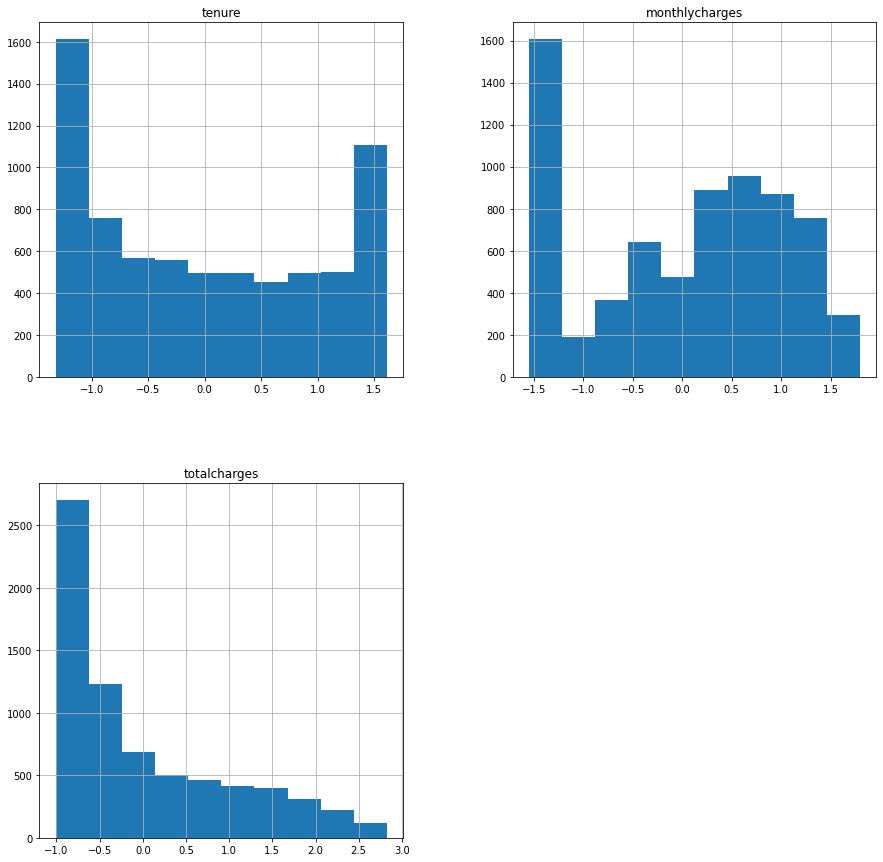

In [200]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
datos[numerical] = scaler.fit_transform(datos[numerical])
datos[numerical].hist(ax=plt.figure(figsize=(15,15)).gca())

<AxesSubplot:>

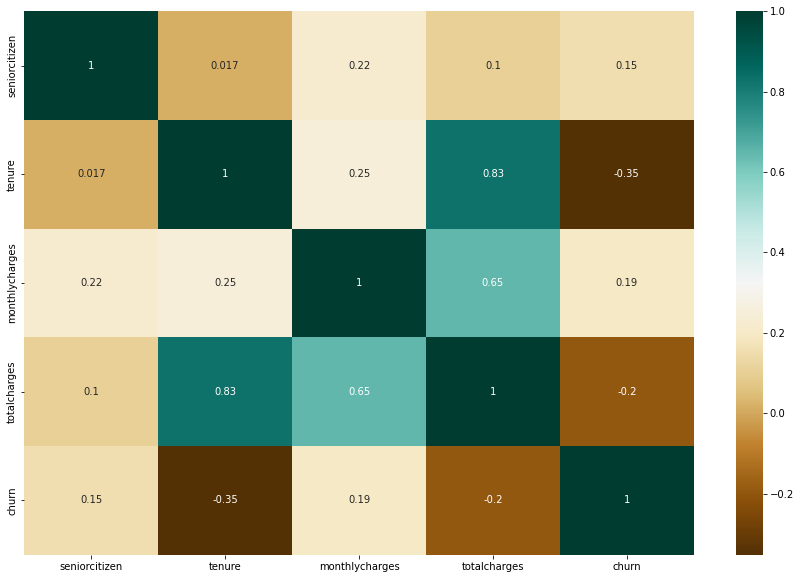

In [201]:
import seaborn as sns

plt.figure(figsize=(15,10))
sns.heatmap(datos.corr(), cmap='BrBG', annot=True)

In [202]:
datos.drop(['tenure'], axis=1, inplace=True)
datos.drop(['totalcharges'], axis=1, inplace=True)

In [203]:
from sklearn.metrics import mutual_info_score

calculate_mi = lambda col: mutual_info_score(col, datos.churn)

df_mi = datos[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
contract,0.098453
onlinesecurity,0.064677
techsupport,0.063021
internetservice,0.055574
onlinebackup,0.046792
paymentmethod,0.044519
deviceprotection,0.043917
streamingmovies,0.032001
streamingtv,0.031908
paperlessbilling,0.019194


<AxesSubplot:xlabel='contract', ylabel='churn'>

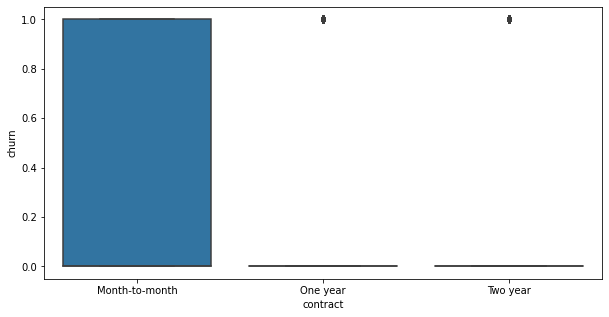

In [204]:
plt.figure(figsize=(10,5))
sns.boxplot(x='contract', y='churn', data=datos)

<AxesSubplot:xlabel='onlinesecurity', ylabel='churn'>

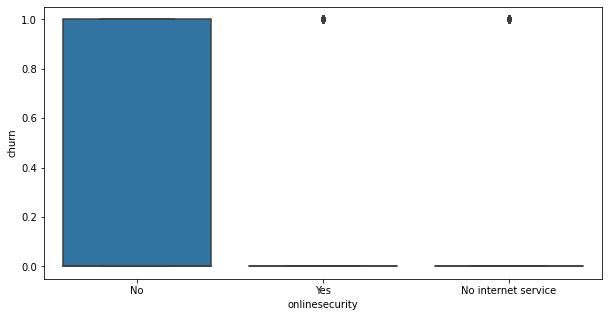

In [205]:
plt.figure(figsize=(10,5))
sns.boxplot(x='onlinesecurity', y='churn', data=datos)

In [206]:
from sklearn.model_selection import train_test_split
from random import randrange

df_train_full, df_test = train_test_split(datos, test_size=0.2, random_state=randrange(10000))

df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=randrange(10000))

y_train = df_train.churn.values
y_val = df_val.churn.values
y_test=df_test.churn.values

del df_test['churn']
del df_train['churn']
del df_val['churn']

In [207]:
train_dict = df_train.to_dict(orient='records')
dict(sorted(train_dict[0].items()))

{'contract': 'One year',
 'customerid': '5160-UXJED',
 'dependents': 'Yes',
 'deviceprotection': 'No',
 'gender': 'Male',
 'internetservice': 'DSL',
 'monthlycharges': -0.6700928009859131,
 'multiplelines': 'No',
 'onlinebackup': 'No',
 'onlinesecurity': 'No',
 'paperlessbilling': 'No',
 'partner': 'No',
 'paymentmethod': 'Mailed check',
 'phoneservice': 'Yes',
 'seniorcitizen': 0,
 'streamingmovies': 'No',
 'streamingtv': 'No',
 'techsupport': 'No'}

In [208]:
from sklearn.feature_extraction import DictVectorizer

dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)
X_train[0]

array([0., 1., 0., ..., 1., 0., 0.])

In [209]:
dv.get_feature_names_out()

array(['contract=Month-to-month', 'contract=One year',
       'contract=Two year', ..., 'techsupport=No',
       'techsupport=No internet service', 'techsupport=Yes'], dtype=object)

In [210]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear')
# model = LinearRegression()
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [211]:
model.score(X_train, y_train)

0.8905670376258612

In [212]:
X_val = dv.transform(df_val.to_dict(orient='records'))
model.score(X_val, y_val)

0.7935483870967742

In [213]:
X_test = dv.transform(df_test.to_dict(orient='records'))
y_pred = model.predict(X_test)
model.score(X_test, y_test)

0.7693399574166075

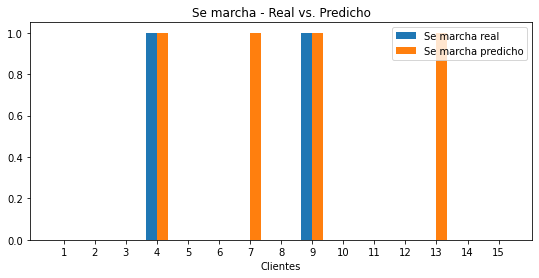

In [214]:
import matplotlib.pyplot as plt
import numpy as np

ind = np.arange(15)
width = 0.35

plt.figure(figsize=(9,4))
plt.bar(ind, y_test[:15], width, label='Se marcha real')
plt.bar(ind+width, y_pred[:15], width, label='Se marcha predicho')

plt.xticks(ind+width/2, np.arange(1, 16))
plt.legend(loc='best')

plt.xlabel('Clientes')
plt.ylabel('')
plt.title('Se marcha - Real vs. Predicho')

plt.show()